In [ ]:
Johansen 검정 (Johansen Cointegration Test)

In [ ]:
# 공적분관계의 수와 모형의 파라미터들을 최우추정법(MLE)으로 추정 검정하는 방법
# 모든 변수를 내생변수로 간주 한다는 점에서 종속변수를 선택할 필요가 없으며 여러 개의 공적분관계를 식별해 낼 수 있음. 
#  최우추정법을 이용하여 VAR 모형으로 공적분관계를 추정하는 한편 우도비검정(likelihood ratio test)을 바탕으로 공적분계수를 결정 할 수 있도록 함.
# 귀무가설(𝑯_𝟎) : 공적분의 관계가 없다. P-value > 유의수준 (0.05)
# 대립가설(𝑯_𝟏) : 공적분의 관계가 있다. P-value < 유의수준 (0.05)


📈 Johansen Cointegration Test Results
Eigenvalues:
[1.05691086e-02 1.61714638e-05]

Trace Statistic:
[6.40620099 0.0097353 ]

Critical Values (90%, 95%, 99%):
[[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]


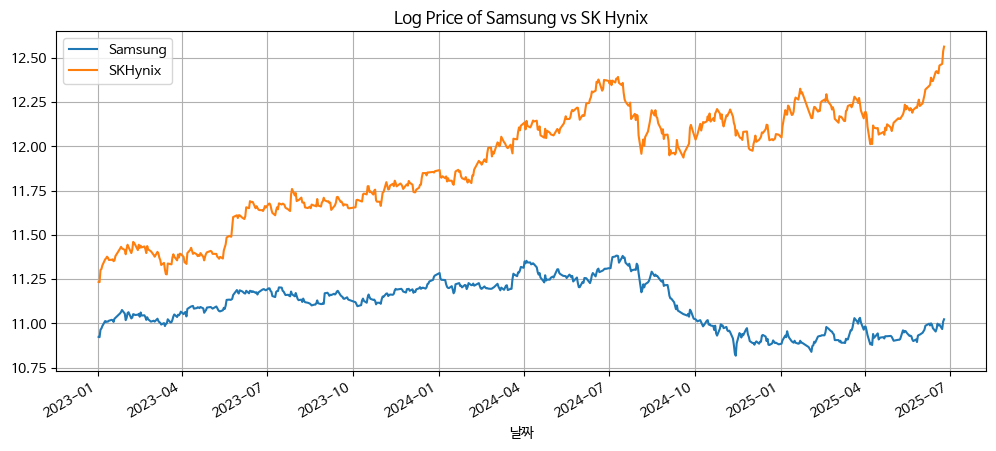

In [9]:
import pandas as pd
import numpy as np
from pykrx import stock
import datetime
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import matplotlib.pyplot as plt

# 1. 날짜 설정
start_date = "2023-01-01"
end_date = "2025-06-25"
start_fmt = datetime.datetime.strptime(start_date, "%Y-%m-%d").strftime("%Y%m%d")
end_fmt = datetime.datetime.strptime(end_date, "%Y-%m-%d").strftime("%Y%m%d")

# 2. 삼성전자 & SK하이닉스 종가 데이터 가져오기
samsung = stock.get_market_ohlcv_by_date(start_fmt, end_fmt, "005930")['종가']
skhynix = stock.get_market_ohlcv_by_date(start_fmt, end_fmt, "000660")['종가']

# 3. 데이터프레임 결합 및 결측 제거
df = pd.concat([samsung, skhynix], axis=1)
df.columns = ['Samsung', 'SKHynix']
df.dropna(inplace=True)

# 4. 로그 변환 (비율 변화가 아닌 가격 자체의 공적분을 보기 위함)
df_log = np.log(df)

# 5. Johansen 공적분 검정 수행
# det_order=0 (no trend), k_ar_diff=1~5 → lag difference 설정 (기본값 1~2로 시작 가능)
johan_result = coint_johansen(df_log, det_order=0, k_ar_diff=1)

# 6. 결과 요약 출력
print("\n📈 Johansen Cointegration Test Results")
print("Eigenvalues:")
print(johan_result.eig)

print("\nTrace Statistic:")
print(johan_result.lr1)

print("\nCritical Values (90%, 95%, 99%):")
print(johan_result.cvt)

# 7. 간단한 시각화: 두 종목의 로그 가격 추이
df_log.plot(title="Log Price of Samsung vs SK Hynix", figsize=(12,5))
plt.grid()
plt.show()


In [ ]:
# 이 검정은 “두 주가가 장기적으로 함께 움직이는가?”를 보는 것
# 비정상적인 시계열이더라도 두 자산이 일정한 비율로 동조화될 경우 공적분 관계 존재

In [ ]:
# 유의수준 : 0.05 경우
# 𝑟=0: 6.40 < 15.49 → 귀무가설 채택 → 공적분 없음
# 𝑟=1: 0.0097 < 3.84 → 귀무가설 채택 → 1개도 없음
# → 따라서 공적분 관계 없음  ==> VAR  모델 사용

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import statsmodels
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt

# 한글폰트 출력하기
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 에러 무시 코드
import warnings
warnings.filterwarnings(action='ignore') 


In [5]:
# 삼성전자 (005930), SK 하이닉스 (000660)  데이터 불러오기

import FinanceDataReader as fdr

# 삼성전자
sm = fdr.DataReader("005930", "2020", "2025")
# sk 하이닉스
sk = fdr.DataReader("000660", "2020", "2025")

# 각 기업 종가데이터 합치기 
data = pd.concat([sm["Close"],sk["Close"]],axis=1)

# 컬럼명 변경
data.columns = ["삼성전자","SK하이닉스"]
data

,삼성전자,SK하이닉스
Date,,
2020-01-02,55200,94700
2020-01-03,55500,94500
2020-01-06,55500,94300
2020-01-07,55800,94000
2020-01-08,56800,97400
...,...,...
2024-12-23,53500,169600
2024-12-24,54400,168500
2024-12-26,53600,170100


Text(0.5, 1.0, '주가추이')

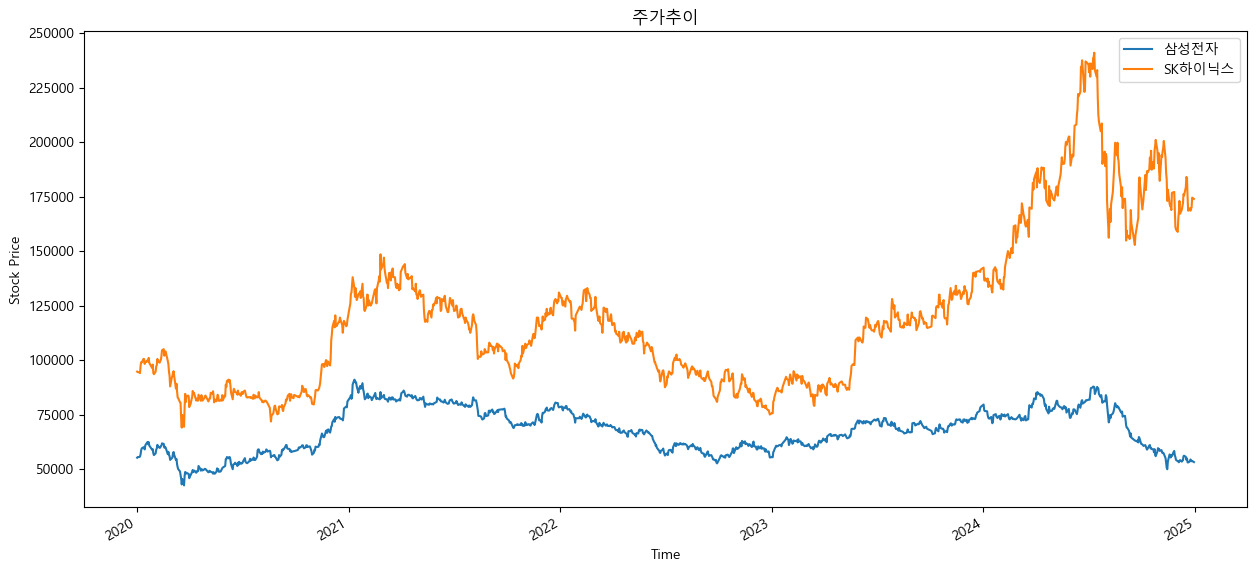

In [6]:
# 주가 추이 그래프

data.plot(figsize=(15,7))
plt.ylabel('Stock Price')
plt.xlabel('Time')
plt.title('주가추이')

Text(0.5, 1.0, '일일수익률')

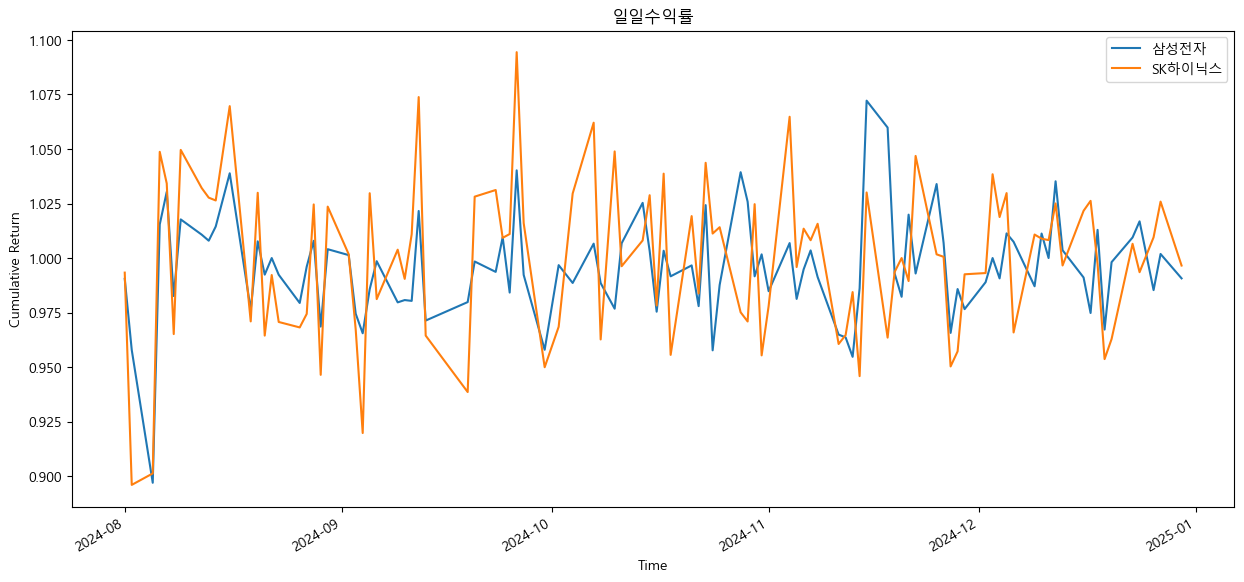

In [7]:
# 일일 수익률 계산
cumm_rtn = (1 + data.pct_change()) # 일일수익률
cumm_rtn = cumm_rtn.dropna()
cumm_rtn = cumm_rtn.tail(100)  

X = cumm_rtn.삼성전자
Y = cumm_rtn.SK하이닉스
pd.concat([X, Y], axis=1).plot(figsize=(15,7))
plt.ylabel('Cumulative Return')
plt.xlabel('Time')
plt.title("일일수익률")

In [8]:
# 공적분 : coint 
# 귀무가설(𝑯_𝟎) : 공적분의 관계가 없다. P-value > 유의수준 (0.05)
#대립가설(𝑯_𝟏) : 공적분의 관계가 있다. P-value < 유의수준 (0.05)

# pvalue < 0.05 이하이면 공적분관계 (장기적으로 일정한 관계가 있다._
score, pvalue, _ = coint(X,Y)
print('Correlation: ' + str(X.corr(Y)))
print('Cointegration test p-value: ' + str(pvalue))

Correlation: 0.5365379276775789
Cointegration test p-value: 1.7061310209970778e-13


In [ ]:
## 공적분 계산

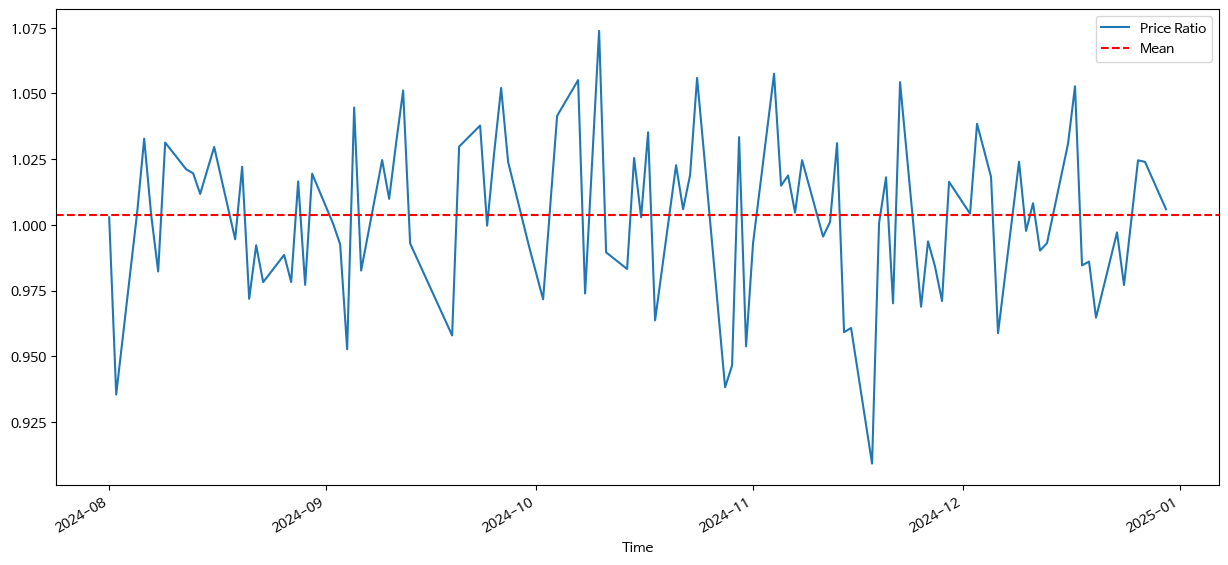

In [10]:
(Y/X).plot(figsize=(15,7))
plt.axhline((Y/X).mean(), color='red', linestyle='--')
plt.xlabel('Time')
plt.legend(['Price Ratio', 'Mean'])
plt.show()

In [ ]:
## 공적분 검증

In [11]:
# 공적분 : coint 
# 귀무가설(𝑯_𝟎) : 공적분의 관계가 없다. P-value > 유의수준 (0.05)
#대립가설(𝑯_𝟏) : 공적분의 관계가 있다. P-value < 유의수준 (0.05)

# pvalue < 0.05 이하이면 공적분관계 (장기적으로 일정한 관계가 있다._
score, pvalue, _ = coint(X,Y)
print('Correlation: ' + str(X.corr(Y)))
print('Cointegration test p-value: ' + str(pvalue))

Correlation: 0.5365379276775789
Cointegration test p-value: 1.7061310209970778e-13


In [ ]:
# 결과 해석 :  P-value < 유의수준 (0.05)  공적분의 관계가 있다.

## Pair Trading 활용

In [ ]:
Pair Trading(쌍둥이 거래)을 위한 기본 전제는 두 종목이 높은 상관성 또는 공적분 관계를 가지고 있을 때 가격 괴리(스프레드)를 활용한 매매 전략을 수립하는 것입니다.
이 전략에 매우 적합한 예시 중 하나가 바로 삼성전자(보통주)와 삼성전자우선주(우선주)입니다.

In [ ]:
# Pair Trading 분석 흐름
# 주가 데이터 수집 및 전처리

# 스프레드 계산 & 평균회귀성 확인

# 공적분 검정 (Johansen & Engle-Granger)

# z-score로 진입/청산 신호 생성

# 백테스트 시뮬레이션

In [ ]:
#삼성전자(005930) 와 삼성전자우(005935)

### 데이터 수집

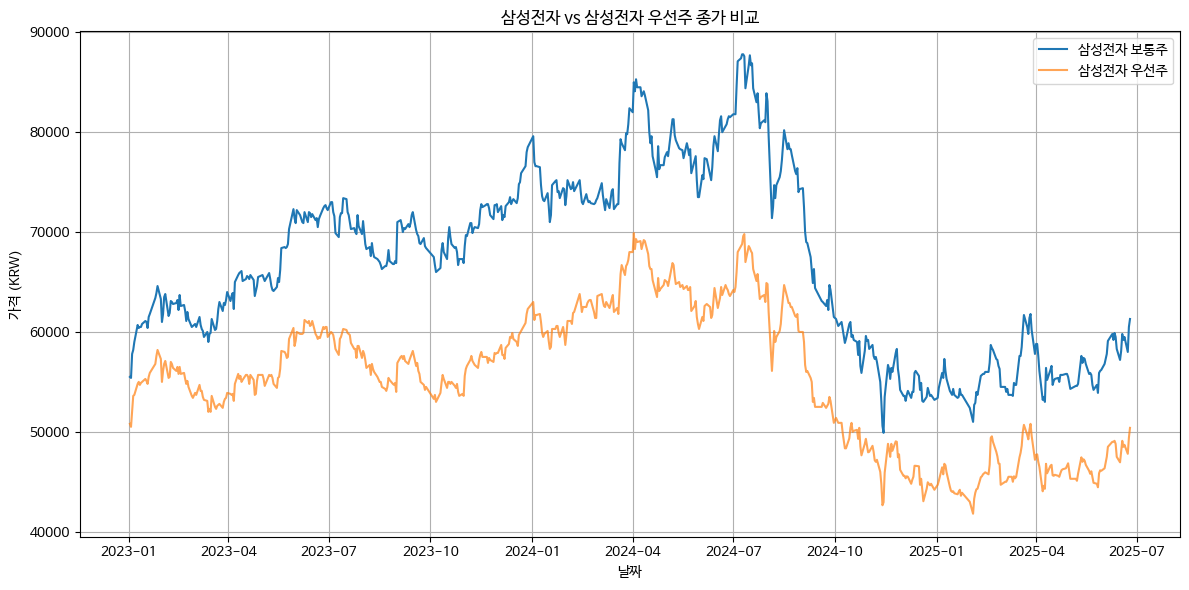

In [19]:
import pandas as pd
import numpy as np
from pykrx import stock
import matplotlib.pyplot as plt
import datetime

# 1. 날짜 설정
start_date = "2023-01-01"
end_date = "2025-06-25"
start_fmt = datetime.datetime.strptime(start_date, "%Y-%m-%d").strftime("%Y%m%d")
end_fmt = datetime.datetime.strptime(end_date, "%Y-%m-%d").strftime("%Y%m%d")

# 2. 종목 코드
samsung = "005930"     # 삼성전자 보통주
samsung_pref = "005935"  # 삼성전자 우선주

# 3. 종가 데이터 수집
price_common = stock.get_market_ohlcv_by_date(start_fmt, end_fmt, samsung)['종가']
price_prefer = stock.get_market_ohlcv_by_date(start_fmt, end_fmt, samsung_pref)['종가']

# 4. 병합
df = pd.concat([price_common, price_prefer], axis=1)
df.columns = ['Samsung_Common', 'Samsung_Preferred']
df.dropna(inplace=True)

# 5. 로그 변환 (스프레드 계산 등 활용)
df_log = np.log(df)

# 6. 시각화
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Samsung_Common'], label='삼성전자 보통주')
plt.plot(df.index, df['Samsung_Preferred'], label='삼성전자 우선주', alpha=0.7)
plt.title("삼성전자 vs 삼성전자 우선주 종가 비교")
plt.xlabel("날짜")
plt.ylabel("가격 (KRW)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


📉 ADF Test on Spread
ADF Statistic: -3.1479174702954906
p-value: 0.023204383835150364
→ 평균회귀 여부: Yes

📊 Johansen Cointegration Test
Trace Statistic: [16.61764395  2.86057904]
Critical Values: [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]

🔗 Engle-Granger Cointegration Test
t-statistic: -3.14325263762601, p-value: 0.07994153961863643


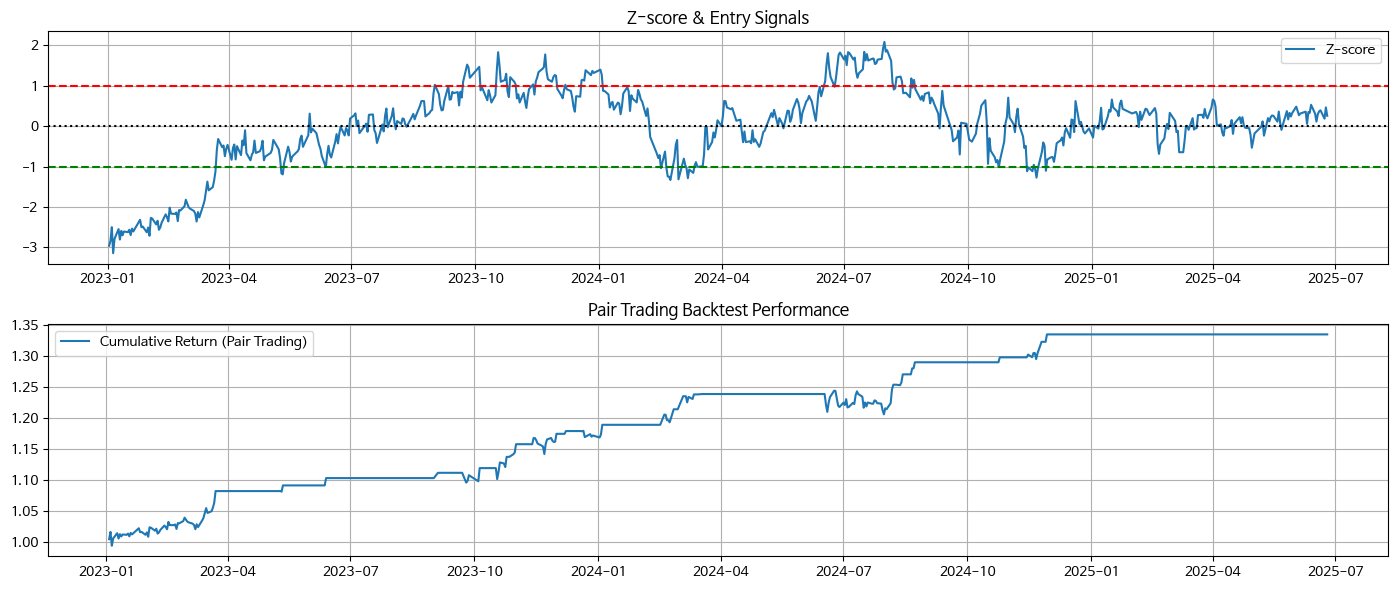

In [20]:
import pandas as pd
import numpy as np
from pykrx import stock
from statsmodels.tsa.stattools import adfuller, coint
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import matplotlib.pyplot as plt

# 1. 날짜 설정
start_date = "2023-01-01"
end_date = "2025-06-25"
start_fmt = pd.to_datetime(start_date).strftime("%Y%m%d")
end_fmt = pd.to_datetime(end_date).strftime("%Y%m%d")

# 2. 종가 불러오기
common = stock.get_market_ohlcv_by_date(start_fmt, end_fmt, "005930")['종가']
preferred = stock.get_market_ohlcv_by_date(start_fmt, end_fmt, "005935")['종가']
df = pd.concat([common, preferred], axis=1)
df.columns = ['Common', 'Preferred']
df.dropna(inplace=True)

# 3. 로그 변환
df_log = np.log(df)

# 4. 스프레드 계산 (단순 차이 또는 회귀 기반)
# 단순 차이 기반 스프레드
spread = df_log['Common'] - df_log['Preferred']

# 5. 평균회귀성 테스트 (ADF)
adf_result = adfuller(spread)
print("📉 ADF Test on Spread")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print("→ 평균회귀 여부:", "Yes" if adf_result[1] < 0.05 else "No")

# 6. 공적분 검정 (Johansen)
cj = coint_johansen(df_log, det_order=0, k_ar_diff=1)
print("\n📊 Johansen Cointegration Test")
print("Trace Statistic:", cj.lr1)
print("Critical Values:", cj.cvt)

# 7. 공적분 검정 (Engle-Granger)
coint_result = coint(df_log['Common'], df_log['Preferred'])
print("\n🔗 Engle-Granger Cointegration Test")
print(f"t-statistic: {coint_result[0]}, p-value: {coint_result[1]}")

# 8. z-score 계산
spread_mean = spread.mean()
spread_std = spread.std()
zscore = (spread - spread_mean) / spread_std

# 9. 진입/청산 신호 설정
entry_threshold = 1.0
exit_threshold = 0.0

# 롱/숏 포지션 생성
df['zscore'] = zscore
df['position'] = 0
df.loc[df['zscore'] > entry_threshold, 'position'] = -1  # 보통주 숏, 우선주 롱
df.loc[df['zscore'] < -entry_threshold, 'position'] = 1  # 보통주 롱, 우선주 숏
df.loc[abs(df['zscore']) < exit_threshold, 'position'] = 0  # 청산

df['position'] = df['position'].ffill()

# 10. 수익률 계산
returns_common = df['Common'].pct_change()
returns_pref = df['Preferred'].pct_change()
df['spread_return'] = df['position'].shift(1) * (returns_common - returns_pref)
df['cumulative'] = (1 + df['spread_return']).cumprod()

# 11. 시각화
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
plt.plot(df.index, zscore, label='Z-score')
plt.axhline(entry_threshold, color='r', linestyle='--')
plt.axhline(-entry_threshold, color='g', linestyle='--')
plt.axhline(0, color='black', linestyle=':')
plt.title("Z-score & Entry Signals")
plt.grid()
plt.legend()

plt.subplot(2,1,2)
plt.plot(df.index, df['cumulative'], label='Cumulative Return (Pair Trading)')
plt.title("Pair Trading Backtest Performance")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


### 매매 구축

In [ ]:
# 전략 요약: Z-score 기반 Pair Trading
# 종목: 삼성전자(005930) vs 삼성전자우(005935)
# 스프레드: 로그 가격 차이 = log(보통주) − log(우선주)
# z-score 계산:
# ​ 진입/청산 룰:𝑍>1.0 → 보통주 숏 / 우선주 롱
# 𝑍<−1.0 → 보통주 롱 / 우선주 숏
# ∣𝑍∣<0.2 → 포지션 청산


In [ ]:
# 최종 백테스트 

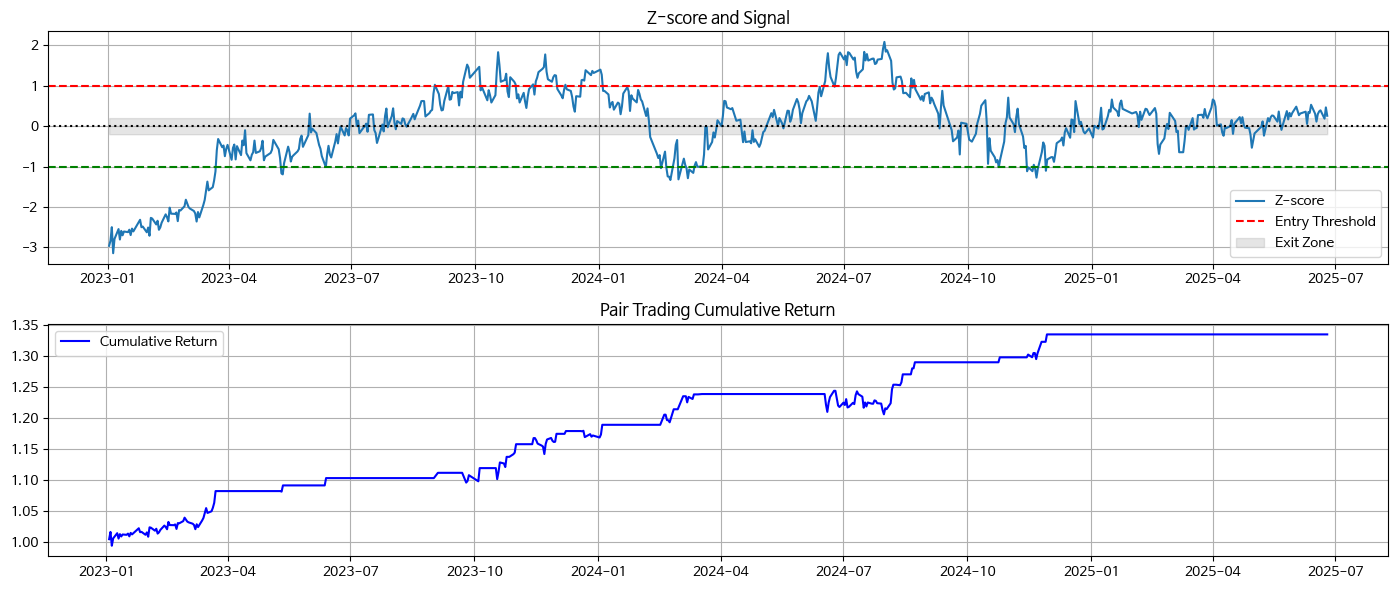

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykrx import stock

# 1. 날짜 설정
start_date = "2023-01-01"
end_date = "2025-06-25"
start_fmt = pd.to_datetime(start_date).strftime("%Y%m%d")
end_fmt = pd.to_datetime(end_date).strftime("%Y%m%d")

# 2. 주가 데이터 불러오기
common = stock.get_market_ohlcv_by_date(start_fmt, end_fmt, "005930")['종가']
preferred = stock.get_market_ohlcv_by_date(start_fmt, end_fmt, "005935")['종가']
df = pd.concat([common, preferred], axis=1)
df.columns = ['Common', 'Preferred']
df.dropna(inplace=True)

# 3. 로그 가격 및 스프레드 계산
df['log_common'] = np.log(df['Common'])
df['log_preferred'] = np.log(df['Preferred'])
df['spread'] = df['log_common'] - df['log_preferred']

# 4. Z-score 계산
spread_mean = df['spread'].mean()
spread_std = df['spread'].std()
df['zscore'] = (df['spread'] - spread_mean) / spread_std

# 5. 포지션 규칙 설정
entry_threshold = 1.0
exit_threshold = 0.2

# 포지션 설정
df['position'] = 0
df.loc[df['zscore'] > entry_threshold, 'position'] = -1  # 보통주 숏, 우선주 롱
df.loc[df['zscore'] < -entry_threshold, 'position'] = 1  # 보통주 롱, 우선주 숏
df.loc[df['zscore'].abs() < exit_threshold, 'position'] = 0  # 포지션 청산
df['position'] = df['position'].ffill()

# 6. 수익률 계산
df['ret_common'] = df['Common'].pct_change()
df['ret_preferred'] = df['Preferred'].pct_change()
df['strategy_return'] = df['position'].shift(1) * (df['ret_common'] - df['ret_preferred'])
df['cumulative_return'] = (1 + df['strategy_return']).cumprod()

# 7. 시각화
plt.figure(figsize=(14,6))

# Z-score
plt.subplot(2,1,1)
plt.plot(df.index, df['zscore'], label='Z-score')
plt.axhline(entry_threshold, color='r', linestyle='--', label='Entry Threshold')
plt.axhline(-entry_threshold, color='g', linestyle='--')
plt.axhline(0, color='black', linestyle=':')
plt.fill_between(df.index, -exit_threshold, exit_threshold, color='grey', alpha=0.2, label='Exit Zone')
plt.title("Z-score and Signal")
plt.legend()
plt.grid()

# 누적 수익률
plt.subplot(2,1,2)
plt.plot(df.index, df['cumulative_return'], label='Cumulative Return', color='blue')
plt.title("Pair Trading Cumulative Return")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# 출력 해석
# 지표	의미
# zscore	진입/청산 시점 시각화 (상단 그래프)
# position	1 = 롱(보통)/숏(우선), -1 = 숏(보통)/롱(우선)
# strategy_return	포지션 별 수익률
# cumulative_return	누적 수익률 그래프 (하단 그래프)

## 수익률 요약 통계 (Sharpe, Win Rate, Max Drawdown) 계산

In [ ]:
# 항목	설명
# Sharpe Ratio	평균 초과 수익률 / 수익률의 표준편차 × √252
# Win Rate	수익이 난 거래 비율
# Max Drawdown	누적 수익률 기준 최대 낙폭 (peak-to-trough 손실)

In [22]:
import numpy as np

# 일일 수익률 벡터
returns = df['strategy_return'].dropna()
cumulative = df['cumulative_return'].dropna()

# 1. Sharpe Ratio (연율화 기준)
mean_daily_return = returns.mean()
std_daily_return = returns.std()
sharpe_ratio = (mean_daily_return / std_daily_return) * np.sqrt(252)

# 2. Win Rate
win_rate = (returns > 0).sum() / len(returns)

# 3. Max Drawdown
rolling_max = cumulative.cummax()
drawdown = cumulative / rolling_max - 1
max_drawdown = drawdown.min()

# 4. 출력
print("📈 Pair Trading Performance Summary")
print(f"Sharpe Ratio        : {sharpe_ratio:.4f}")
print(f"Win Rate            : {win_rate:.2%}")
print(f"Max Drawdown        : {max_drawdown:.2%}")


📈 Pair Trading Performance Summary
Sharpe Ratio        : 1.9444
Win Rate            : 14.26%
Max Drawdown        : -3.05%


In [ ]:
수수료를 반영한 Pair Trading : 왕복 수수료(매수+매도 합산)로 약 **0.1%~0.2%

📊 수수료 반영 Pair Trading 성과 요약
Sharpe Ratio        : 1.3490
Win Rate            : 14.10%
Max Drawdown        : -3.72%


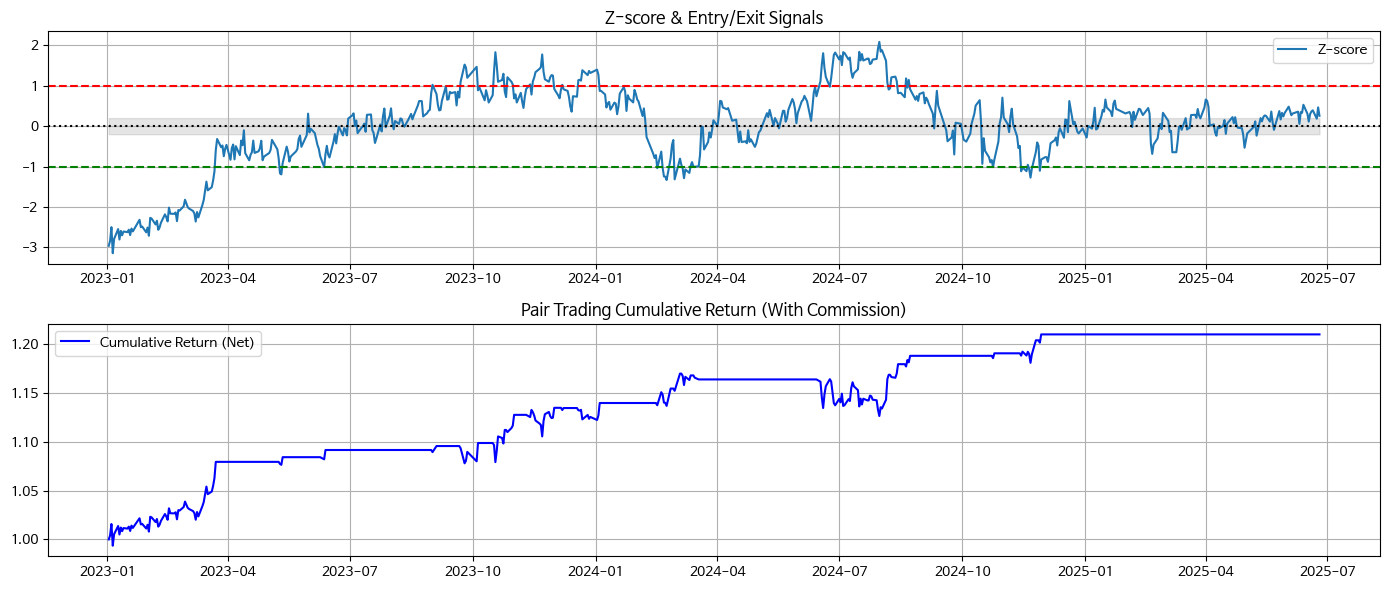

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykrx import stock

# 1. 날짜 설정
start_date = "2023-01-01"
end_date = "2025-06-25"
start_fmt = pd.to_datetime(start_date).strftime("%Y%m%d")
end_fmt = pd.to_datetime(end_date).strftime("%Y%m%d")

# 2. 주가 불러오기
common = stock.get_market_ohlcv_by_date(start_fmt, end_fmt, "005930")['종가']
preferred = stock.get_market_ohlcv_by_date(start_fmt, end_fmt, "005935")['종가']
df = pd.concat([common, preferred], axis=1)
df.columns = ['Common', 'Preferred']
df.dropna(inplace=True)

# 3. 스프레드와 z-score
df['log_common'] = np.log(df['Common'])
df['log_preferred'] = np.log(df['Preferred'])
df['spread'] = df['log_common'] - df['log_preferred']
spread_mean = df['spread'].mean()
spread_std = df['spread'].std()
df['zscore'] = (df['spread'] - spread_mean) / spread_std

# 4. 포지션 설정
entry_threshold = 1.0
exit_threshold = 0.2
df['position'] = 0
df.loc[df['zscore'] > entry_threshold, 'position'] = -1
df.loc[df['zscore'] < -entry_threshold, 'position'] = 1
df.loc[df['zscore'].abs() < exit_threshold, 'position'] = 0
df['position'] = df['position'].ffill()

# 5. 수익률 및 포지션 변화
df['ret_common'] = df['Common'].pct_change()
df['ret_preferred'] = df['Preferred'].pct_change()
df['spread_return'] = df['position'].shift(1) * (df['ret_common'] - df['ret_preferred'])

# 6. 수수료 계산
commission_rate = 0.002  # 왕복 수수료 0.2%
df['trade_flag'] = df['position'].diff().abs() > 0  # 포지션 변경 시 거래 발생
df['net_return'] = df['spread_return'] - df['trade_flag'] * commission_rate

# 7. 누적 수익률
df['cumulative_return'] = (1 + df['net_return'].fillna(0)).cumprod()

# 8. 요약 통계
returns = df['net_return'].dropna()
cumulative = df['cumulative_return'].dropna()
sharpe = (returns.mean() / returns.std()) * np.sqrt(252)
win_rate = (returns > 0).mean()
rolling_max = cumulative.cummax()
drawdown = cumulative / rolling_max - 1
max_dd = drawdown.min()

# 9. 출력
print("📊 수수료 반영 Pair Trading 성과 요약")
print(f"Sharpe Ratio        : {sharpe:.4f}")
print(f"Win Rate            : {win_rate:.2%}")
print(f"Max Drawdown        : {max_dd:.2%}")

# 10. 시각화
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
plt.plot(df.index, df['zscore'], label='Z-score')
plt.axhline(entry_threshold, color='r', linestyle='--')
plt.axhline(-entry_threshold, color='g', linestyle='--')
plt.axhline(0, color='black', linestyle=':')
plt.fill_between(df.index, -exit_threshold, exit_threshold, color='grey', alpha=0.2)
plt.title("Z-score & Entry/Exit Signals")
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.plot(df.index, df['cumulative_return'], color='blue', label='Cumulative Return (Net)')
plt.title("Pair Trading Cumulative Return (With Commission)")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()
